![Callysto Banner](https://raw.githubusercontent.com/Ariel-VB/Central-Limit-Theorem/master/Callysto_Notebook-Banner_Top_06.06.18.jpg)

In [1]:
#Running this cell displays a button to toggle hidden code
#From: http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/

from IPython.display import HTML

display (HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>'''))

In [2]:
#Colour Functions!

def colour_green(value):
    color = "#7be840"
    return "background-color: %s" % color
def colour_blue(value):
    color = "#70aeff"
    return "background-color: %s" % color
def colour_grey(value):
    color = "#a5a5a5"
    return "background-color: %s" % color
def colour_yellow(value):
    color = "#fcff66"
    return "background-color: %s" % color
def colour_orange(value):
    color = "#ffa449"
    return "background-color: %s" % color

In [3]:
# Remove warnings from the tools below that will soon be outdated
import warnings
warnings.filterwarnings("ignore")

# Recycling Contamination

When people throw waste into the wrong bin, they cause that waste stream to be contaminated. 
<br> Contamination in each waste stream causes different problems:

### <font color=grey>Landfill:</font>
> When **compostable waste** enters the Landfill, it releases methane (a powerful greenhouse gas) into the atmosphere, which contributes to global warming.
> <br> When **recyclable waste** enters the Landfill, the resources used to make the recyclable items are lost and take up valuable space.
### <font color=blue>Recycling:</font>
> When **compostable waste** enters the Recycling stream, it ruins the recyclable items and causes them to be sent to Landfill.
<br> When **landfill waste** enters the Recycling stream, it clogs up the machines used to sort recyclable waste and causes mechanical issues.
### <font color=green>Compost:</font>
> When **recyclable** and **landfill waste** enter the Compost stream, they have to be sorted out by workers using their hands, or else they are ground up into tiny bits and left in the soil, harming ecosystems.

## Below is a table showing typical contamination values <br> for each waste stream.

> The **bottom row** calculates how much contamination is in each stream by dividing the _number of contaminants_ by the _total number of items_ disposed in each stream.

> Cells with the number of items disposed correctly in each stream are colour-coded, and contamination is highlighted yellow.

In [4]:
## Contamination Data Table
# Values are pre-set: qgrid allows them to be changed, but the % Contamination value does not automatically update.

import pandas as pd
import qgrid

streams = ['Compost', 'Recycling', 'Landfill']
contamination = [[8.0, 2.0, 6.0], 
                 [1.0, 7.0, 2.0], 
                 [1.0, 1.0, 2.0],
                [20.0, 30.0, 80.0]] 
rows = ["Compost" , "Recycling", "Landfill", "% Contamination"]

conTable = pd.DataFrame(data = contamination, columns = streams , index = rows)
conTable.set_value("% Contamination", "Compost", 0.2)
conTable.set_value("% Contamination", "Recycling", 0.3)
conTable.set_value("% Contamination", "Landfill", 0.8)

display(conTable.style.applymap(colour_green, subset=("Compost","Compost"))\
        .applymap(colour_blue, subset=("Recycling", "Recycling"))\
        .applymap(colour_grey, subset=("Landfill", "Landfill"))\
        .applymap(colour_yellow, subset=("% Contamination","Compost"))\
        .applymap(colour_yellow, subset=("% Contamination", "Recycling"))\
        .applymap(colour_yellow, subset=("% Contamination", "Landfill"))\
        .format("{:.0%}", subset = ("% Contamination",("Compost", "Recycling", "Landfill"))))

,Compost,Recycling,Landfill
Compost,8,2,6
Recycling,1,7,2
Landfill,1,1,2
% Contamination,20%,30%,80%


## How is % Contamination affected by waste disposal choices?

Try changing the numbers in the first 3 rows of each column. As you change the 
<br> number of items in each stream, you'll notice that the % Contamination row automatically updates.

In [5]:
## Contamination Table with values that automatically update the % Contamination
# qgrid allows

import qgrid
from IPython.display import clear_output


df = pd.DataFrame(data = contamination, columns=streams, index = rows)

def handler1(event, qgrid_widgetCont):
    df = qgrid_widgetCont.get_changed_df()
    
    # Updating the Compost column
    compostPercent = round((df["Compost"]["Recycling"]+df["Compost"]["Landfill"])/(df["Compost"]["Compost"]+df["Compost"]["Recycling"]+df["Compost"]["Landfill"])*100, 0)
    df.set_value("% Contamination", "Compost", compostPercent)
    
    # Updating the Recycling column
    recyclingPercent = round((df["Recycling"]["Compost"]+df["Recycling"]["Landfill"])/(df["Recycling"]["Compost"]+df["Recycling"]["Recycling"]+df["Recycling"]["Landfill"])*100 , 0)
    df.set_value("% Contamination", "Recycling", recyclingPercent)
    
    # Updating the Landfill column
    landfillPercent = round((df["Landfill"]["Compost"]+df["Landfill"]["Recycling"])/(df["Landfill"]["Compost"]+df["Landfill"]["Recycling"]+df["Landfill"]["Landfill"])*100, 0)
    df.set_value("% Contamination", "Landfill", landfillPercent)
    
    qgrid_widgetCont = qgrid.show_grid(df)
    clear_output()
    qgrid_widgetCont.on(names = 'cell_edited', handler = handler1)
    display(qgrid_widgetCont)

qgrid_widgetCont = qgrid.show_grid(df)
qgrid_widgetCont.on(names = 'cell_edited', handler = handler1)
qgrid_widgetCont

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

# Data Communication

Looking at a bunch of numbers in a table is tiring, and requires each reader to imagine what each value represents.
Instead, data analysts and scientists use graphs to "visualize" their data.

**Pie charts** and **Stacked barplots** are two ways to visualize data that are percentages of a "whole".
> Look at the pie charts and stacked barplots below. Which graph is the easiest to understand?

### Pie Charts

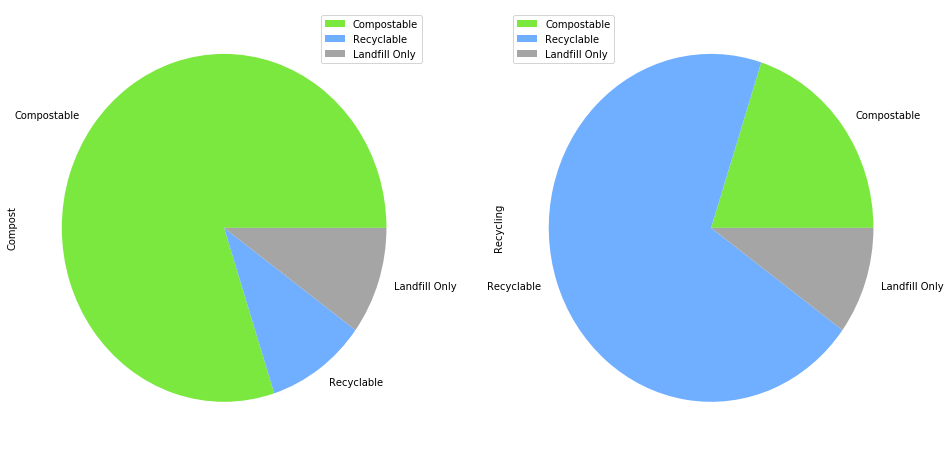

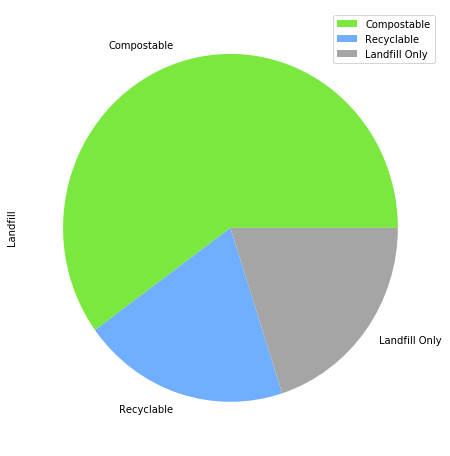

In [9]:
# Science communication - putting data into graphs.
# Pie charts are often used to express different values as percentages of a whole.

# Creating a pie plot <https://python-graph-gallery.com/140-basic-pieplot-with-panda/>


contaminationCost = [[8.0, 2.0, 6.0], 
                 [1.0, 7.0, 2.0], 
                 [1.0, 1.0, 2.0],
                [20.0, 30.0, 80.0],
                    [8, 0, 32]] 
# library
import pandas as pd
 
# --- dataset 1: just 4 values for 4 groups:
dfCompost = pd.DataFrame([8,1,1], index=['a', 'b', 'c'], columns=['x'])
 
# make the plot
#dfCompost.plot(kind='pie', subplots=True, figsize=(8, 8))

# --- dataset 2: 3 columns and rownames
#dfContamination = pd.DataFrame({'Compost':[8,1,1], 'Recycling':[7,1,3], 'Landfill':[6,2,2]}, index=['Compostable', 'Recyclable', 'Landfill Only'] )

# make the multiple plot
#dfContamination.plot(kind='pie', subplots=True, figsize=(24,8))


dfCompostRecycling = pd.DataFrame({'Compost':[8,1,1], 'Recycling':[2,7,1]}, index=['Compostable', 'Recyclable', 'Landfill Only'])
comrecPlot = dfCompostRecycling.plot(kind='pie', subplots=True, figsize=(16,8), colors=['#7be840', '#70aeff', '#a5a5a5'])

dfLandfill = pd.DataFrame({'Landfill':[6,2,2]}, index=['Compostable', 'Recyclable', 'Landfill Only'])
landPlot = dfLandfill.plot(kind='pie', subplots=True, figsize=(7.5,8), colors=['#7be840', '#70aeff', '#a5a5a5'])

Pie charts are sometimes a misleading way to present data because humans cannot easily see the quantity in each section. 

#### Instead, data analysts prefer barplots, which present data along an axis to clearly display values.
 * Because our contamination data are best represented as percentages, we create something called a "Stacked Percent Barplot".
 * If we wanted to instead compare the quantities in each stream, we would create a stacked barplot with a metric such as kg along the y-axis.

### Stacked Percent Barplot

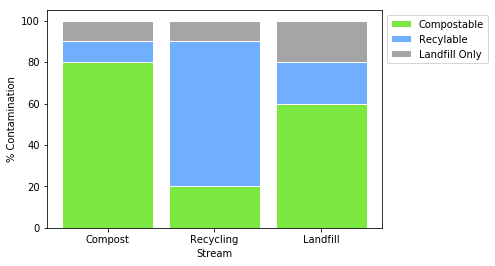

In [10]:

# Science communication - putting data into graphs.
# Percent stacked barplot is something used to visually compare quantities next to each other, easier to read than a table

#Source for a stacked percent barplot: <https://python-graph-gallery.com/13-percent-stacked-barplot/>

# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2]
raw_data = {'greenBars': [8.0, 2.0, 6.0], 'blueBars': [1.0, 7.0, 2.0],'greyBars':  [1.0, 1.0, 2.0]} #same data as above
barplot_df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(barplot_df['greenBars'], barplot_df['blueBars'], barplot_df['greyBars'])]
greenBars = [i / j * 100 for i,j in zip(barplot_df['greenBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(barplot_df['blueBars'], totals)]
greyBars = [i / j * 100 for i,j in zip(barplot_df['greyBars'], totals)]
 
# plot
barWidth = 0.85
names = ('Compost','Recycling','Landfill')

# Create green Bars
plt.bar(r, greenBars, color="#7be840", edgecolor='white', width=barWidth, label="Compostable")
# Create blue Bars
plt.bar(r, blueBars, bottom=greenBars, color="#70aeff", edgecolor='white', width=barWidth, label="Recylable")
# Create grey Bars
plt.bar(r, greyBars, bottom=[i+j for i,j in zip(greenBars, blueBars)], color="#a5a5a5", edgecolor='white', width=barWidth, label="Landfill Only")
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Stream")

# Custom y axis
plt.ylabel("% Contamination")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()

This barplot shows all streams in one chart, compared to the three pie charts needed above.
<br> More importantly, now each stream's percent contamination can be compared more easily!

# Waste Disposal Costs
> Waste disposal and collection costs money. 
<br>In Squamish, the municipal government uses taxes to collect waste from your homes.
<br> However, businesses must pay for their own waste collection. 

>Often, payment is calculated using "Tip Fees" which are different depending on the waste stream being collected, or "tipped".
<br> In Squamish, Tip Fees for different waste streams are:

In [6]:
import pandas as pd

types = ['Compost Tip Fee', 'Recycling Tip Fee', 'Landfill Tip Fee']
fees = [["$8.00", "$0 (free!)", "$15.00 if no more than 20% contaminated"],
       ["","", "$32.00 if more than 20% contaminated"]]
rowsFees = ["$ / 100 kg",""]

tipFees = pd.DataFrame(data = fees, index = rowsFees, columns = types)
display(tipFees)

,Compost Tip Fee,Recycling Tip Fee,Landfill Tip Fee
$ / 100 kg,$8.00,$0 (free!),$15.00 if no more than 20% contaminated
,,,$32.00 if more than 20% contaminated


## Total Costs

> Let's say that each stream contains 100 kg of each type of waste. <br>
> As above, the % Contamination is highlighted yellow, and the Cost is highlighted orange.

In [7]:
streams = ['Compost', 'Recycling', 'Landfill']
contaminationCost = [[8.0, 2.0, 6.0], 
                 [1.0, 7.0, 2.0], 
                 [1.0, 1.0, 2.0],
                [20.0, 30.0, 80.0],
                    [8, 0, 32]] 
rowsCost = ["Compost" , "Recycling", "Landfill", "% Contamination", "Cost ($)"]

conTableCost = pd.DataFrame(data = contaminationCost, columns = streams , index = rowsCost)
conTableCost.set_value("% Contamination", "Compost", 0.2)
conTableCost.set_value("% Contamination", "Recycling", 0.3)
conTableCost.set_value("% Contamination", "Landfill", 0.8)

display(conTableCost.style.applymap(colour_green, subset=("Compost","Compost"))\
                            .applymap(colour_blue, subset=("Recycling", "Recycling"))\
                            .applymap(colour_grey, subset=("Landfill", "Landfill"))\
                            .applymap(colour_yellow, subset=("% Contamination","Compost"))\
                            .applymap(colour_yellow, subset=("% Contamination", "Recycling"))\
                            .applymap(colour_yellow, subset=("% Contamination", "Landfill"))\
                            .applymap(colour_orange, subset=("Cost ($)","Compost"))\
                            .applymap(colour_orange, subset=("Cost ($)", "Recycling"))\
                            .applymap(colour_orange, subset=("Cost ($)", "Landfill"))\
                            .format("{:.0%}", subset = ("% Contamination",("Compost", "Recycling", "Landfill"))))

,Compost,Recycling,Landfill
Compost,8,2,6
Recycling,1,7,2
Landfill,1,1,2
% Contamination,20%,30%,80%
Cost ($),8,0,32


## Higher Tip Fees for Contamination
> To encourage businesses to reduce and sort their waste, Squamish requires them <br> to pay a higher Tip Fee if their Landfill waste is contaminated.

> In the table below, change values in the Landfill stream to bring contamination **below 20%**. <br> What happens to the Cost?

In [8]:
## import warnings
warnings.filterwarnings("ignore")


df2 = pd.DataFrame(data = contaminationCost, columns=streams, index = rowsCost)

def handler2(event, qgrid_widgetCost):
    df2 = qgrid_widgetCost.get_changed_df()
    
    # Updating the Compost column
    compostPercent2 = round((df2["Compost"]["Recycling"]+df2["Compost"]["Landfill"])/(df2["Compost"]["Compost"]+df2["Compost"]["Recycling"]+df2["Compost"]["Landfill"])*100, 0)
    df2.set_value("% Contamination", "Compost", compostPercent2)
    
    compostCost = 8
    df2.set_value("Cost ($)", "Compost", round(compostCost, 2))
    
    # Updating the Recycling column
    recyclingPercent2 = round((df2["Recycling"]["Compost"]+df2["Recycling"]["Landfill"])/(df2["Recycling"]["Compost"]+df2["Recycling"]["Recycling"]+df2["Recycling"]["Landfill"])*100, 0)
    df2.set_value("% Contamination", "Recycling", recyclingPercent2)
    
    recyclingCost = 0
    df2.set_value("Cost ($)", "Recycling", recyclingCost)
    
    # Updating the Landfill column
    landfillPercent2 = round((df2["Landfill"]["Compost"]+df2["Landfill"]["Recycling"])/(df2["Landfill"]["Compost"]+df2["Landfill"]["Recycling"]+df2["Landfill"]["Landfill"])*100, 0)
    df2.set_value("% Contamination", "Landfill", landfillPercent2)
    
    if landfillPercent2 > 20:
        landfillCost = 32.00
        df2.set_value("Cost ($)", "Landfill", round(landfillCost, 2))
    else:
        landfillCost = 15
        df2.set_value("Cost ($)", "Landfill", round(landfillCost, 2))
      
    #Update and display the grid
    qgrid_widgetCost = qgrid.show_grid(df2)
    clear_output()
    qgrid_widgetCost.on(names = 'cell_edited', handler = handler2)
    display(qgrid_widgetCost)
    totalCost = df2.get_value("Cost ($)","Compost") + df2.get_value("Cost ($)","Recycling") + df2.get_value("Cost ($)","Landfill")
    print ("Your total waste management cost is: $", totalCost)

qgrid_widgetCost = qgrid.show_grid(df2)
qgrid_widgetCost.on(names = 'cell_edited', handler = handler2)
display(qgrid_widgetCost)

totalCost = df2.get_value("Cost ($)","Compost") + df2.get_value("Cost ($)","Recycling") + df2.get_value("Cost ($)","Landfill")
print ("Your total waste management cost is: $", totalCost)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Your total waste management cost is: $ 40.0


# Waste Reduction, or Decontamination?

> For the environment, waste reduction is always a top priority. But some businesses must continue producing waste to stay _in_ business! So, what should they try to do?

> Think about the different weights and costs: 
* If 100kg of contaminated Landfill waste costs \$32,
<br> **How much would it cost to throw out 50kg of Landfill waste?**

> _Click the button below to show the answer._

In [11]:
#Create a button to show the table with the answer.

#Tools
import ipywidgets as widgets
from IPython.display import clear_output

#Make the button
showAnswer_button= widgets.Button(
    description='Show',
    disabled=False,
    button_style='info', # 'success' (green), 'info' (blue), 'warning' (orange), 'danger' (red) or '' (white)
    tooltip='Click me',
    icon=''
)

#Make the table that shows the answer.
weight = [["100kg ( >20% contaminated)", "$32"], 
             ["50kg ( >20% contaminated)", "$16"],
             ["100kg ( <20% contaminated)","$15"]]
colname = [" ","  ", "   "]
rowname = ["Weight", "Cost"]

zeroWaste = pd.DataFrame(data = weight, columns = rowname, index = colname)


#Define the button's function
def showAnswer(w):
    clear_output()
    display(showAnswer_button)
    display(zeroWaste.style.applymap(colour_orange, subset=(" ", "Cost"))\
                            .applymap(colour_yellow, subset=("  ", "Cost"))\
                            .applymap(colour_green, subset=("   ", "Cost")))
    print ("The cheapest option is to decontaminate the Landfill waste stream!")

#"When you click the button, execute this function"    
showAnswer_button.on_click(showAnswer)

display(showAnswer_button)

Button(button_style='info', description='Show', style=ButtonStyle(), tooltip='Click me')

# In Conclusion:

> * We can understand how different items contaminate waste streams using tables.
> * Recycling stream contamination is expressed in percentages.
> * Data can be shown clearly in stacked barplots.
> * Streamlining a waste management system is cheaper than reducing overall waste. 


![Callysto Banner](https://github.com/Ariel-VB/Central-Limit-Theorem/blob/master/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)